In [1]:
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import seaborn as sns
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs
from sklearn.preprocessing import StandardScaler  # Feature scaling
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

# Importing modules for machine learning from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# Importing evaluation metrics
from sklearn.metrics import classification_report,f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, auc
from sklearn.preprocessing import LabelEncoder
import shap
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy import stats


In [2]:
#import data
loan_df = pd.read_csv("C:/Users/oracl/OneDrive/Desktop/Project/Data/Loan Default Prediction Dataset - NIKHIL.csv")


In [3]:
#preview dataset
loan_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#check the shape dataset
loan_df.shape

(255347, 18)

In [5]:
#drop the first column loan ID as we would not be using it 
loan_df=loan_df.drop('LoanID', axis = 1)

In [6]:
#check for the description and data types in the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [7]:
#preview dataset
loan_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [8]:
#check for the number of missing values in each column
print(loan_df.isnull().sum())

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [9]:
loan_df.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
loan_df.duplicated().sum()

0

In [11]:
#we have no missing values so we continue with the processing

In [12]:
sns.set_palette("Set1")

In [13]:
#our target variable for this exercise would be dafault so we would check for the distribution of defaulters
loan_df['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

In [14]:
#we have 225,694 non defaulters and about 29,653 defaulters

In [15]:
#we start the exploratory data analysis by visualizing the number of non-defaulters and defaulters

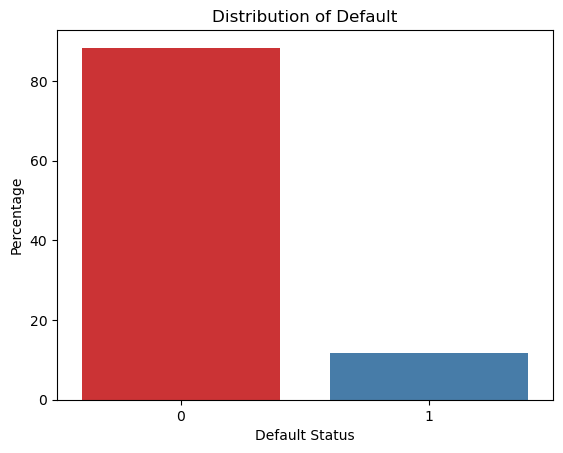

In [16]:
# Calculate the percentage of each Default value
default_percentage = (loan_df['Default'].value_counts() / loan_df['Default'].count()) * 100

# Create a bar plot for the 'Default' column distribution as percentage
sns.barplot(x=default_percentage.index, y=default_percentage.values)

plt.title('Distribution of Default')
plt.xlabel('Default Status')  # Adding an x-label for clarity
plt.ylabel('Percentage')
plt.show()

In [17]:
#Over 80% did not default and less than 20% of the applicants defaulted

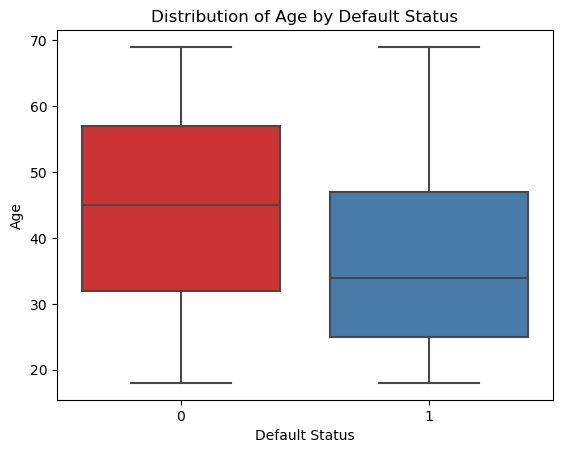

In [18]:
#visualizing the distribution of defaulters by their Age
sns.boxplot(data=loan_df, y='Age', x='Default')

plt.title('Distribution of Age by Default Status')
plt.xlabel('Default Status') 
plt.ylabel('Age')  
plt.show()

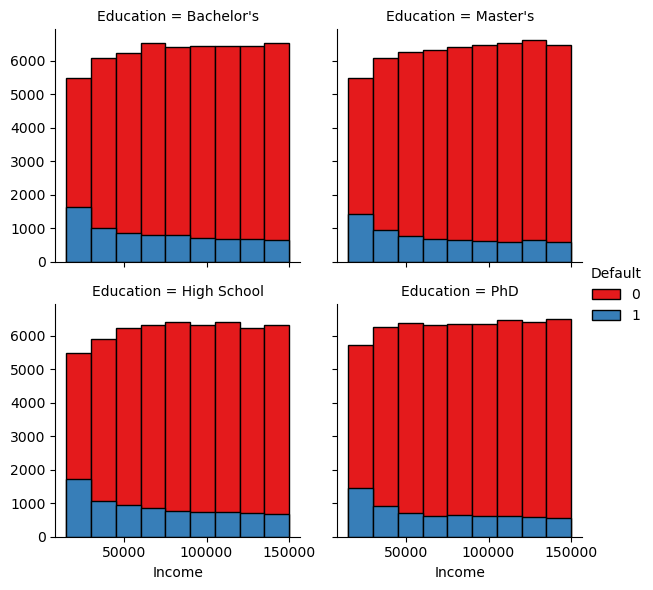

In [19]:
#this shows the distribution of income
# Calculate bins based on the range of Income
bins = np.linspace(loan_df['Income'].min(), loan_df['Income'].max(), 10)

# Setup the FacetGrid
g = sns.FacetGrid(loan_df, col="Education", hue="Default", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Income', bins=bins, ec="k")  # 'ec' stands for edge color


g.add_legend()
plt.show()

In [20]:
# Group by 'Default', count 'Education' values, and reshape the data
education_counts = loan_df.groupby('Default')['Education'].value_counts().unstack(fill_value=0)

# Print the resulting DataFrame
print(education_counts)


Education  Bachelor's  High School  Master's    PhD
Default                                            
0               56577        55673     56633  56811
1                7789         8230      6908   6726


In [21]:
# Include NaN values in the count
education_counts_including_na = loan_df['Education'].value_counts(dropna=False)

# Print the results including NaN values
print(education_counts_including_na)

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64


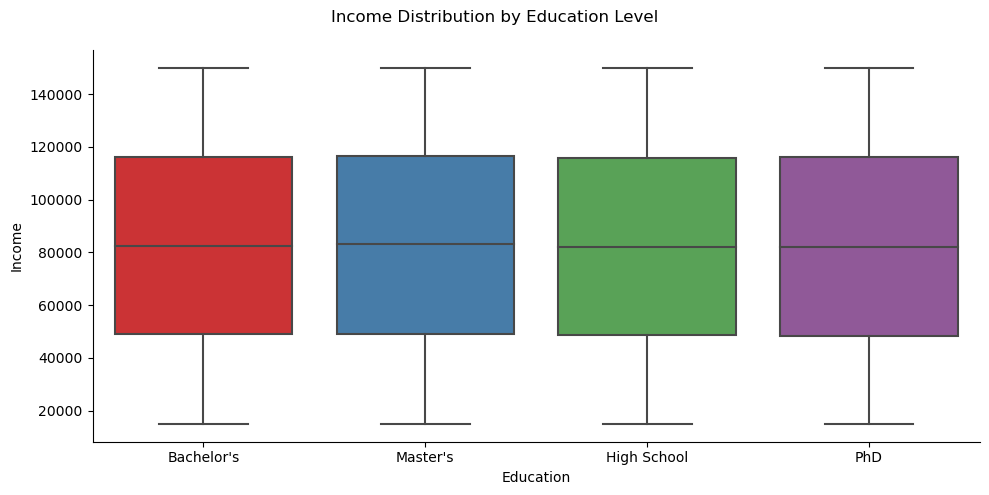

In [22]:
g = sns.catplot(data=loan_df, x='Education', y='Income', kind="box", height=5, aspect=2)
g.set_axis_labels("Education", "Income") 
g.fig.suptitle('Income Distribution by Education Level')
g.fig.subplots_adjust(top=0.9) 

plt.show()

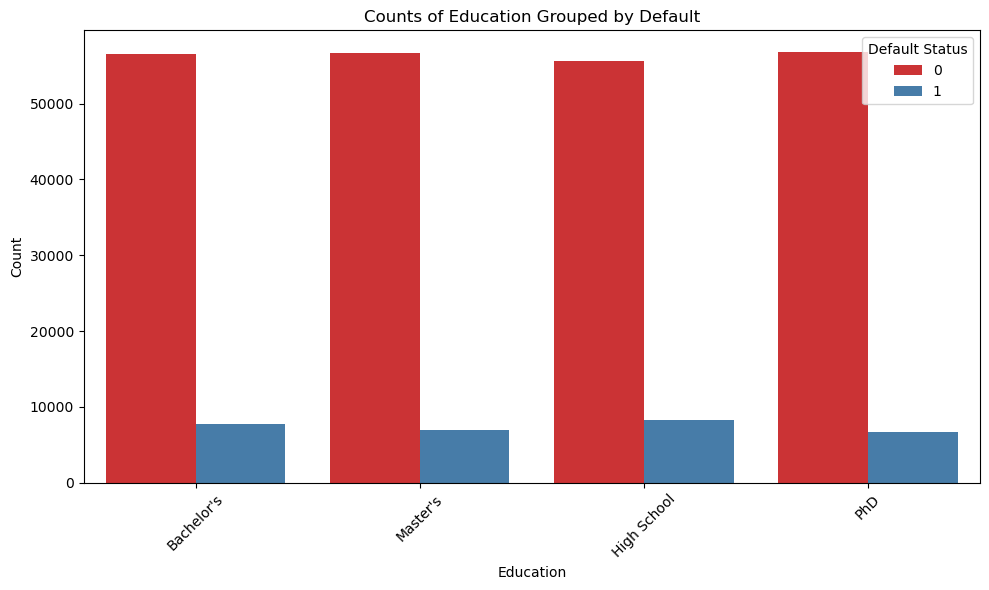

In [23]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='Education', hue='Default', palette='Set1') 

plt.title('Counts of Education Grouped by Default')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Default Status') 


plt.xticks(rotation=45) 
plt.tight_layout()  

plt.show()

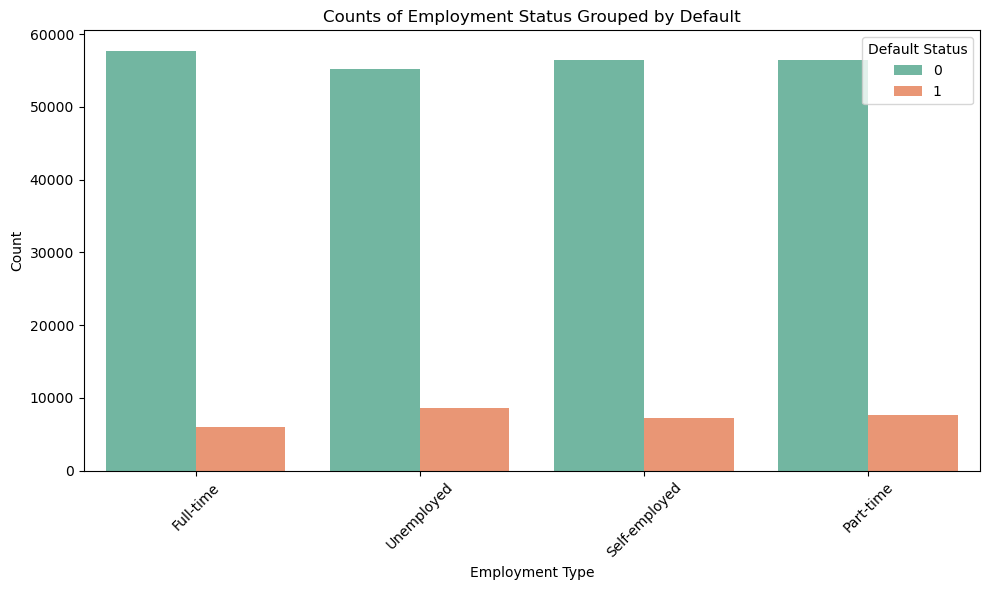

In [24]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='EmploymentType', hue='Default', palette='Set2') 
plt.title('Counts of Employment Status Grouped by Default')
plt.xlabel('Employment Type') 
plt.ylabel('Count')
plt.legend(title='Default Status') 

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)  
plt.tight_layout() 

plt.show()

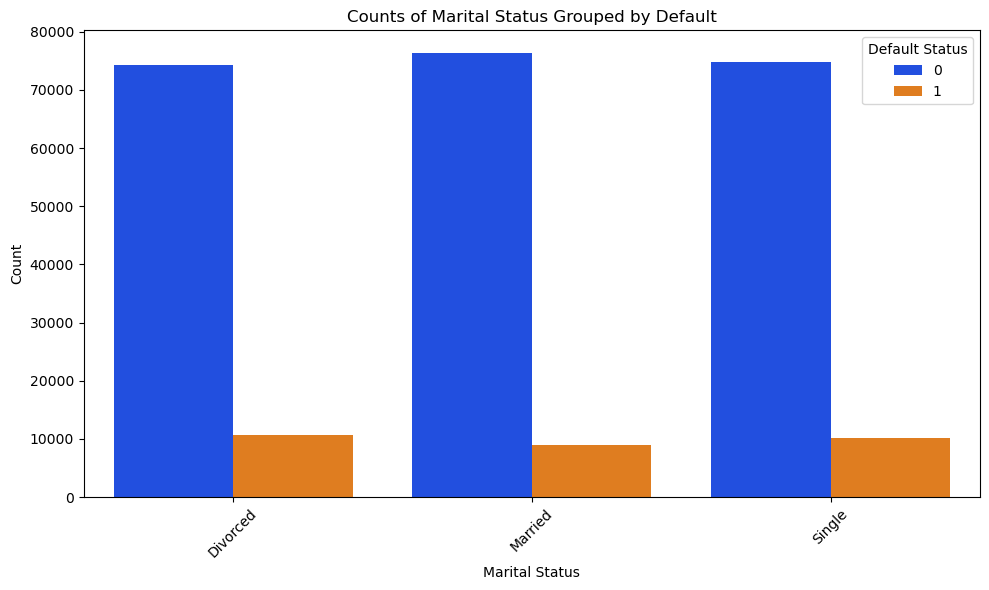

In [25]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='MaritalStatus', hue='Default', palette='bright') 

plt.title('Counts of Marital Status Grouped by Default')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Default Status', loc='upper right')  

plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

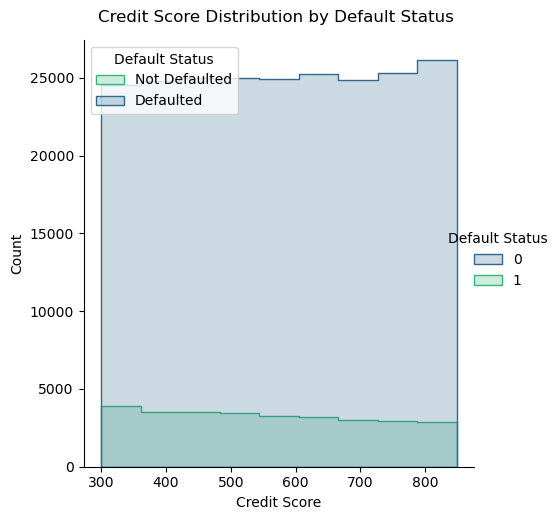

In [26]:
# Calculate bins for histogram
bins = np.linspace(loan_df.CreditScore.min(), loan_df.CreditScore.max(), 10)

# Create the histogram plot using Seaborn's displot
plot = sns.displot(loan_df, x='CreditScore', bins=bins, hue='Default', element="step", palette="viridis")

# Adding enhancements for better visualization
plot.fig.suptitle('Credit Score Distribution by Default Status', y=1.03)  # Add a title to the plot and adjust vertical spacing
plt.xlabel('Credit Score')  # Label for the x-axis
plt.ylabel('Count')         # Label for the y-axis

# Adjust legend title and location
plot._legend.set_title('Default Status')
plt.legend(title='Default Status', labels=['Not Defaulted', 'Defaulted'], loc='upper left')

# Display the plot
plt.show()


In [27]:
# Sample Data Loading
# loan_df = pd.read_csv('path_to_your_data.csv')

# Define a mapping for 'yes' and 'no' to binary values
binary_map = {'Yes': 1, 'No': 0}

# Columns to convert
columns_to_convert = ['HasMortgage', 'HasDependents', 'HasCoSigner']

# Check for nulls and unexpected values
for column in columns_to_convert:
    print(f"Unique values before mapping in {column}: {loan_df[column].unique()}")
    if loan_df[column].isnull().any():
        print(f"Warning: {column} contains null values. These will become NaN after mapping if not handled.")

# Apply mapping to convert 'yes' and 'no' to binary values
for column in columns_to_convert:
    loan_df[column] = loan_df[column].map(binary_map).fillna(loan_df[column])

# Validation of the results
for column in columns_to_convert:
    print(f"Unique values after mapping in {column}: {loan_df[column].unique()}")

# Display the first few rows to confirm changes
loan_df.head()

Unique values before mapping in HasMortgage: ['Yes' 'No']
Unique values before mapping in HasDependents: ['Yes' 'No']
Unique values before mapping in HasCoSigner: ['Yes' 'No']
Unique values after mapping in HasMortgage: [1 0]
Unique values after mapping in HasDependents: [1 0]
Unique values after mapping in HasCoSigner: [1 0]


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


In [28]:
# Identify non-numeric columns
non_numeric_columns = loan_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns identified for encoding:", non_numeric_columns)

# Apply one-hot encoding
loan_df_encoded = pd.get_dummies(loan_df, columns=non_numeric_columns)

# Display the first few rows to confirm changes and see the newly created columns
loan_df_encoded.head()

Non-numeric columns identified for encoding: Index(['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'], dtype='object')


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,1,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,0,0,1,0,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,0,1,1,0,0,1,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,1,0,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0,1,1,0,0,1,0,0,0,0


In [29]:
# Apply one-hot encoding
loan_df_encoded = pd.get_dummies(loan_df, columns=non_numeric_columns)

# Convert all columns to integers
loan_df_encoded = loan_df_encoded.astype(int)

# Drop specific dummy columns to avoid multicollinearity and reduce dimensionality
loan_df_encoded.drop(
    columns=['Education_PhD', 'EmploymentType_Full-time', 'LoanPurpose_Other'], 
    axis=1, 
    inplace=True
)

# Checking the modified DataFrame's structure and memory info
loan_df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Age                           255347 non-null  int32
 1   Income                        255347 non-null  int32
 2   LoanAmount                    255347 non-null  int32
 3   CreditScore                   255347 non-null  int32
 4   MonthsEmployed                255347 non-null  int32
 5   NumCreditLines                255347 non-null  int32
 6   InterestRate                  255347 non-null  int32
 7   LoanTerm                      255347 non-null  int32
 8   DTIRatio                      255347 non-null  int32
 9   HasMortgage                   255347 non-null  int32
 10  HasDependents                 255347 non-null  int32
 11  HasCoSigner                   255347 non-null  int32
 12  Default                       255347 non-null  int32
 13  Education_Bach

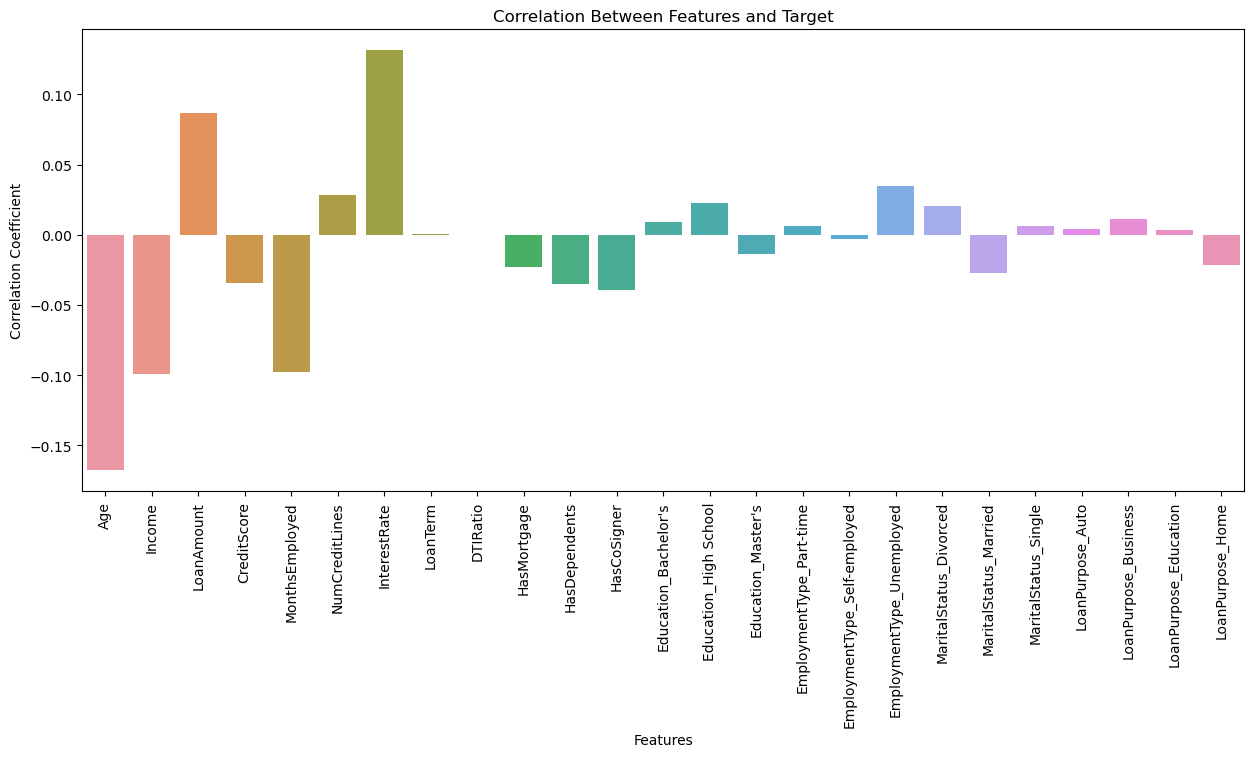

In [30]:
#we check to see the variable correlation relationships
# Calculate the correlation matrix
correlation_matrix = loan_df_encoded.corr()

# Extract 'Default' correlations
default_correlation = correlation_matrix['Default'].drop('Default')  # Drop self-correlation

# Convert to DataFrame for easier plotting
default_corr_df = pd.DataFrame(default_correlation).reset_index()
default_corr_df.columns = ['Feature', 'Correlation Coefficient']

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(data=default_corr_df, x='Feature', y='Correlation Coefficient')
plt.xticks(rotation=90)  # Rotate the feature names for better visibility
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Between Features and Target")
plt.show()

In [31]:
#The relationships between the variables and the default appear top be non linear.
#We would use all features for the first experiment

In [32]:
# Select Target and Features
y = loan_df_encoded['Default']
X = loan_df_encoded.drop(columns=['Default'])

# Print the shapes of X and y to confirm their dimensions
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (255347, 25)
y shape: (255347,)


In [33]:
#normalize data
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and then transform it
X_scaled = scaler.fit_transform(X)

# Display the first entry of the scaled features
print(X_scaled[0:1])

[[ 8.33989509e-01  8.96928115e-02 -1.08683299e+00 -3.41492335e-01
   5.90533211e-01  1.34193677e+00  3.02085174e-01 -1.52594275e-03
   0.00000000e+00  9.99972587e-01  9.99463619e-01  9.99784630e-01
   1.72253011e+00 -5.77749720e-01 -5.75567057e-01 -5.79305322e-01
  -5.76561919e-01 -5.77273394e-01  1.41524433e+00 -7.08268087e-01
  -7.06460964e-01 -4.98620366e-01 -5.01398443e-01 -4.99605897e-01
  -5.01325053e-01]]


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=14)

# Print the shapes of the training and testing data
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (204277, 25) (204277,)
Test set: (51070, 25) (51070,)


In [35]:
#modelbuilding

In [36]:
#Logistics Regression
log_reg1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
log_reg1

LogisticRegression(C=0.01, solver='liblinear')

In [37]:
# Predicting the test set results
y_pred = log_reg1.predict(X_test)

In [38]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train, log_reg1.predict(X_train)))
print("Test set Accuracy: ",accuracy_score(y_test, y_pred))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test, y_pred, average='weighted')))

Train set Accuracy:  0.8838684727110737
Test set Accuracy:  0.885725474838457
F1 Score: 0.8329


In [39]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45208
           1       0.78      0.01      0.01      5862

    accuracy                           0.89     51070
   macro avg       0.83      0.50      0.48     51070
weighted avg       0.87      0.89      0.83     51070



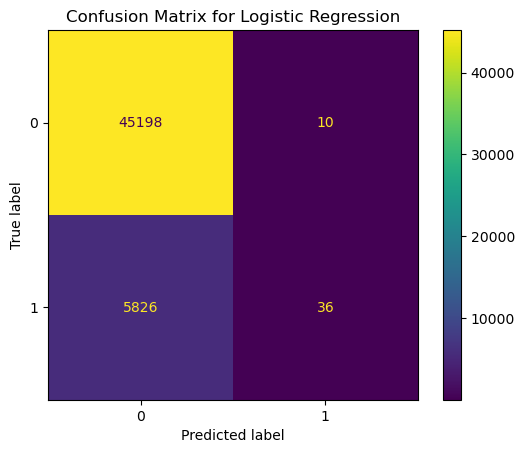

True Positives (TP): 36
False Positives (FP): 10
True Negatives (TN): 45198
False Negatives (FN): 5826


In [40]:
# Assuming 'log_reg1' is your logistic regression model and 'X_test', 'y_test' are your test datasets
y_pred = log_reg1.predict(X_test)

# Generate the confusion matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Extracting TP, FP, TN, FN from the confusion matrix
# For a binary classification the matrix shape is 2x2
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Output the results
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


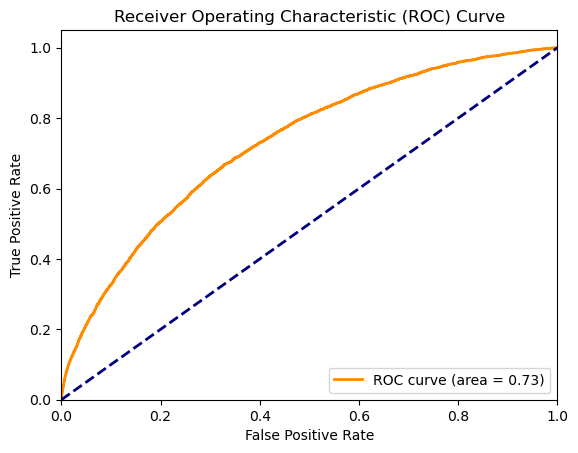

In [41]:
# Predict probabilities on the test set
ylog_probs1 = log_reg1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ylog_probs1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [42]:
# XG BOOST CLASSIFIER
xgb1 = XGBClassifier()
# Fitting the model with the training Data
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
# Making Predictions
yhat_xgb1 = xgb1.predict(X_test)

In [44]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train, xgb1.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_xgb1))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test, yhat_xgb1, average='weighted')))

Train set Accuracy:  0.8934045438301914
Test set Accuracy:  0.8858037987076561
F1 Score: 0.8469


In [45]:
# Classification Report
print(classification_report(y_test, yhat_xgb1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45208
           1       0.52      0.08      0.14      5862

    accuracy                           0.89     51070
   macro avg       0.70      0.53      0.54     51070
weighted avg       0.85      0.89      0.85     51070



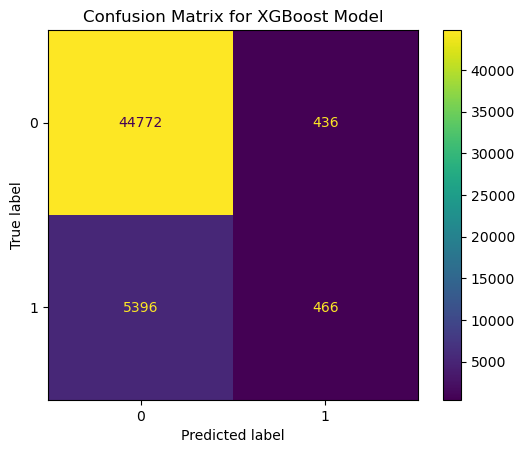

True Positives (TP): 466
False Positives (FP): 436
True Negatives (TN): 44772
False Negatives (FN): 5396


In [46]:
# Generate the confusion matrix using actual labels and predictions
confusion_matrix_lr = confusion_matrix(y_test, yhat_xgb1)

# Display the confusion matrix visually
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# Extract TP, FP, TN, FN from the confusion matrix for binary classification
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Print out the confusion matrix values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


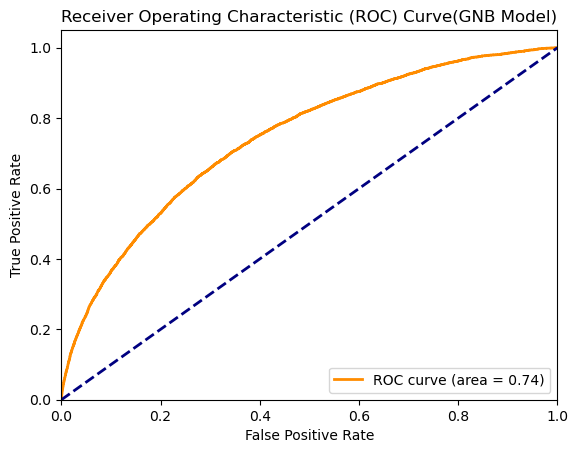

In [47]:
# Predict probabilities on the test set
yxgb_probs1 = xgb1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, yxgb_probs1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve(GNB Model)')
plt.legend(loc="lower right")
plt.show()

In [48]:
# Gaussian Naive Bayes
gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
gnb_yhat1 = gnb1.predict(X_test)

In [49]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train, gnb1.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, gnb_yhat1))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test, gnb_yhat1, average='weighted')))

Train set Accuracy:  0.8839908555539782
Test set Accuracy:  0.8855688271000588
F1 Score: 0.8329


In [50]:
# Classification Report
print(classification_report(y_test, gnb_yhat1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45208
           1       0.66      0.01      0.01      5862

    accuracy                           0.89     51070
   macro avg       0.77      0.50      0.48     51070
weighted avg       0.86      0.89      0.83     51070



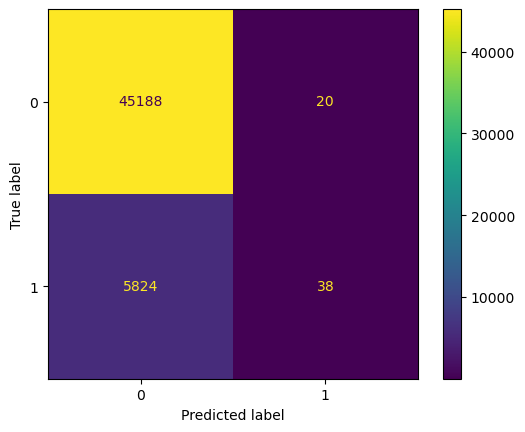

True Positives (TP): 38
False Positives (FP): 20
True Negatives (TN): 45188
False Negatives (FN): 5824


In [51]:
# Assuming y_test is your true labels and gnb_yhat1 are the predictions from a model
confusion_matrix_lr = confusion_matrix(y_test, gnb_yhat1)

# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

# confusion_matrix_lr is a 2x2 numpy array when dealing with binary classification
# [TN, FP]
# [FN, TP]

# Extracting True Negatives, False Positives, False Negatives, and True Positives
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Print these values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


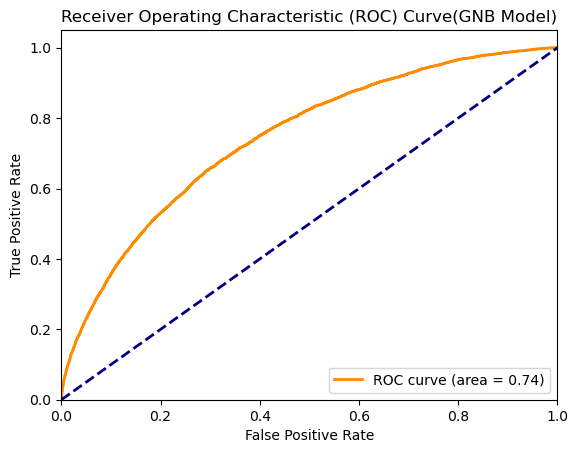

In [52]:
# Predict probabilities on the test set
ygnb_probs1 = gnb1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ygnb_probs1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve(GNB Model)')
plt.legend(loc="lower right")
plt.show()

In [53]:
#Decision Tree
loanTree1 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Training our model
loanTree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [54]:
# Prediction
yhat_tree1 = loanTree1.predict(X_test)

In [55]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train, loanTree1.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat_tree1))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test, yhat_tree1, average='weighted')))

Train set Accuracy:  0.8835355913783735
Test set Accuracy:  0.8852163696886626
F1 Score: 0.8313


In [56]:
# Classification Report
print(classification_report(y_test, yhat_tree1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45208
           1       0.00      0.00      0.00      5862

    accuracy                           0.89     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.89      0.83     51070



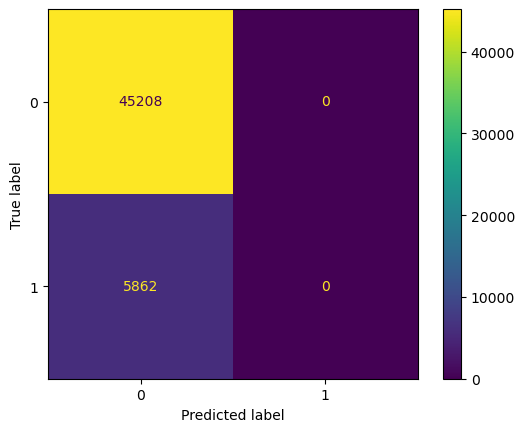

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 45208
False Negatives (FN): 5862


In [57]:
# Assuming y_test contains the actual labels and yhat_tree1 contains the predictions from a decision tree model
confusion_matrix_lr = confusion_matrix(y_test, yhat_tree1)

# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

# Extract True Negatives, False Positives, False Negatives, and True Positives from the matrix
# For a binary classification, the confusion matrix looks like this:
# [TN, FP]
# [FN, TP]
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Print these values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


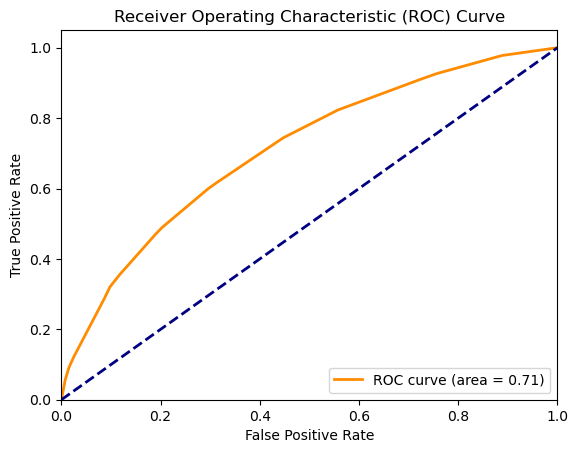

In [58]:
# Predict probabilities on the test set
ytree_probs1 = loanTree1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ytree_probs1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

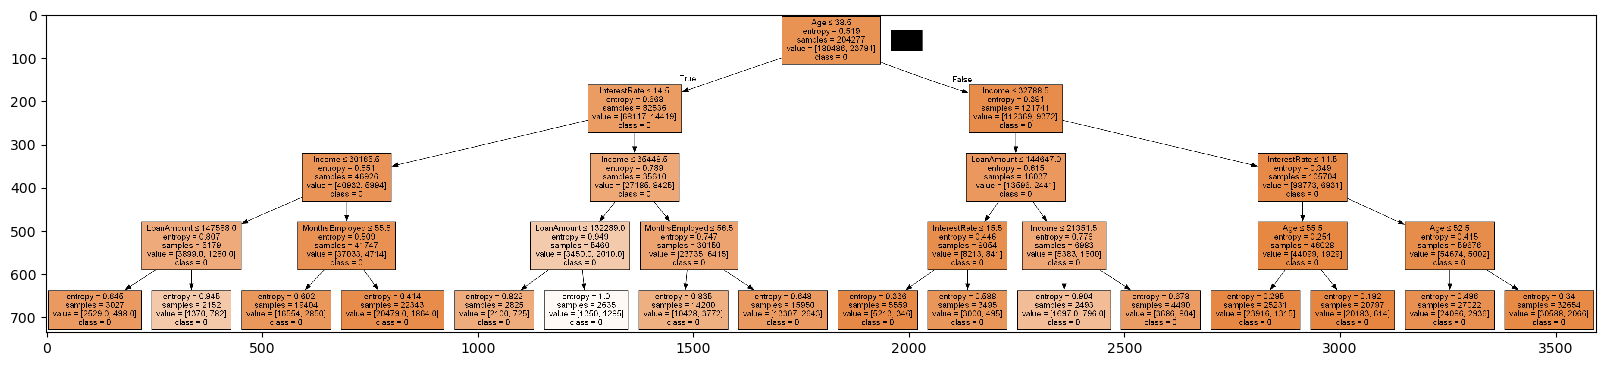

In [59]:
#Decision Tree
dot_data = StringIO()
# Define feature names as a list
featureNames = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
                'HasMortgage', 'HasDependents', 'HasCoSigner', "Education_Bachelor's", 'Education_High School', "Education_Master's",
                'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
                'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home']

# Export Decision Tree to Graphviz format
out = tree.export_graphviz(loanTree1, feature_names=featureNames, out_file=dot_data, class_names=[
                           '0', '1'], filled=True, special_characters=True, rotate=False)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write graph to a PNG file
filename = "LoanTree.png"
graph.write_png(filename)

# Display the PNG image using Matplotlib
img = mpimg.imread(filename)
plt.figure(figsize=(20, 30))
plt.imshow(img, interpolation='nearest')
plt.show()

In [60]:
#Comapring results
model_names = ['Logistic Regression', 'Xg Boost',
              'Gaussian Naive Bayes', 'Decision Trees']
test_accuracy = [0.8857, 0.8858, 0.8855, 0.8852]
f1_scores = [0.8391, 0.8469, 0.8329, 0.8313]
auc_roc_scores = [0.73, 0.74, 0.74, 0.71]
compare_df = pd.DataFrame({
    "Model": model_names,
    "Test Accuracy": test_accuracy,
    "F1-Score": f1_scores,
    "AUC-ROC": auc_roc_scores
})
compare_df.head()

,Model,Test Accuracy,F1-Score,AUC-ROC
0,Logistic Regression,0.8857,0.8391,0.73
1,Xg Boost,0.8858,0.8469,0.74
2,Gaussian Naive Bayes,0.8855,0.8329,0.74
3,Decision Trees,0.8852,0.8313,0.71


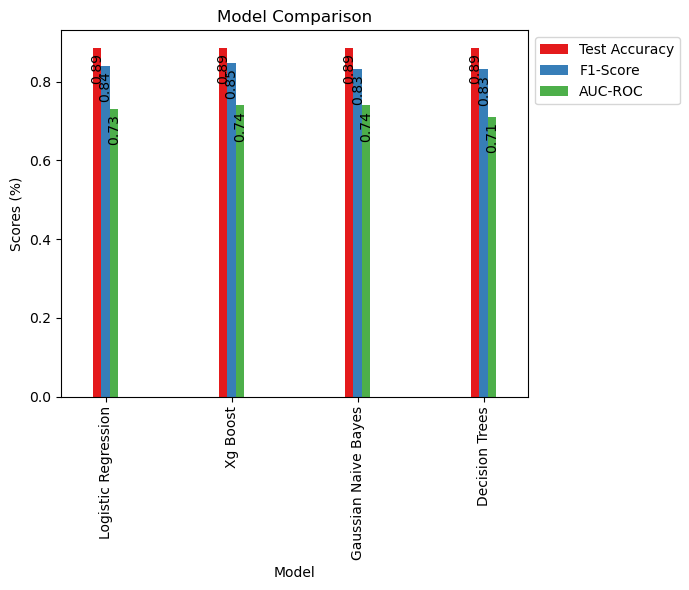

In [61]:
ax = compare_df.plot(x="Model", kind="bar", figsize=(7, 6), width=0.2)
ax.set_ylabel("Scores (%)")
ax.set_title("Model Comparison")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -15), textcoords='offset points', rotation=90)
plt.tight_layout()
plt.show()

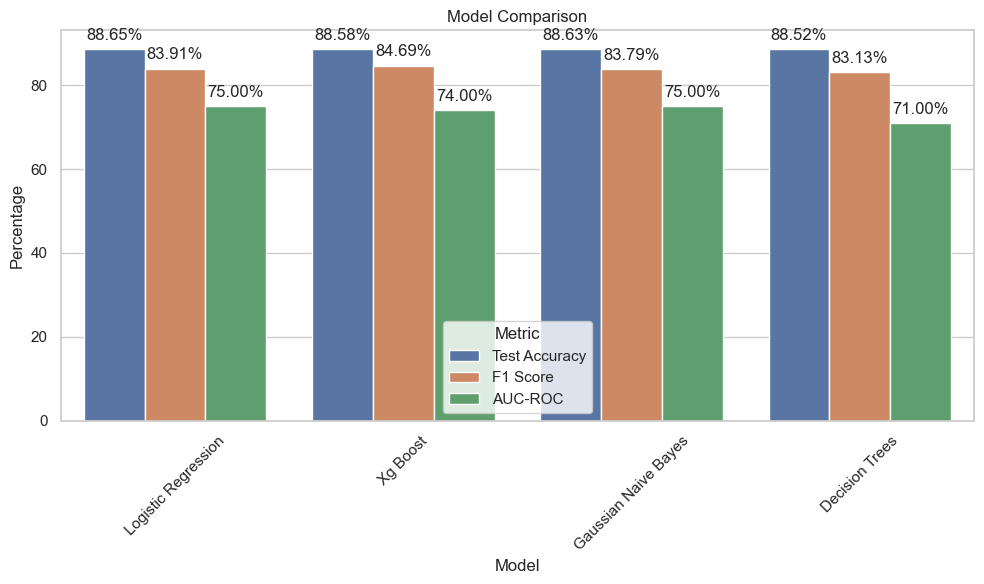

In [62]:
# Define model names and performance metrics
model_names = ['Logistic Regression', 'Xg Boost', 'Gaussian Naive Bayes', 'Decision Trees']
test_accuracy = [88.65, 88.58, 88.63, 88.52]  # Convert to percentages
f1_scores = [83.91, 84.69, 83.79, 83.13]
auc_roc_scores = [75.00, 74.00, 75.00, 71.00]

# Create DataFrame
compare_df = pd.DataFrame({
    "Model": model_names * 3,  # Repeat model names for each metric
    "Value": test_accuracy + f1_scores + auc_roc_scores,
    "Metric": ["Test Accuracy"] * 4 + ["F1 Score"] * 4 + ["AUC-ROC"] * 4
})

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(x='Model', y='Value', hue='Metric', data=compare_df)

# Set titles and labels
plt.title('Model Comparison')
plt.ylabel('Percentage')
plt.xlabel('Model')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Function to add labels on the bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points')

# Add labels to each bar
add_labels(ax)

# Display the plot
plt.tight_layout()
plt.show()


In [63]:
#Improve the Model
#We motice that the classes are not balanced. We balance the classes using Smote
# Apply SMOTE to generate synthetic samples for the minority class
X_2 = loan_df_encoded.drop('Default', axis =1)
X_2.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home
0,56,85994,50587,520,80,4,15,36,0,1,...,0,0,0,1,0,0,0,0,0,0
1,69,50432,124440,458,15,1,4,60,0,0,...,0,0,0,0,1,0,0,0,0,0
2,46,84208,129188,451,26,3,21,24,0,1,...,0,0,1,1,0,0,1,0,0,0
3,32,31713,44799,743,0,3,7,24,0,0,...,0,0,0,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6,48,0,0,...,0,0,1,1,0,0,1,0,0,0


In [64]:
y_2 = loan_df_encoded.Default
y_2.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int32

In [65]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_2, y_2)

In [66]:
X_resampled.shape

(451388, 25)

In [67]:
y_resampled.shape

(451388,)

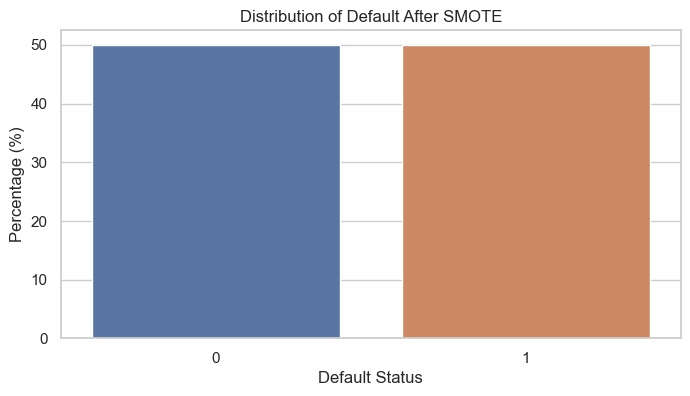

In [68]:
# Calculate the percentage for each class in the resampled target variable
class_distribution = y_resampled.value_counts(normalize=True) * 100

# Create a DataFrame from the distribution for easier plotting
distribution_df = pd.DataFrame({'Default': class_distribution.index, 'Percentage': class_distribution.values})

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='Default', y='Percentage', data=distribution_df)
plt.title('Distribution of Default After SMOTE')
plt.xlabel('Default Status')
plt.ylabel('Percentage (%)')
plt.show()

In [69]:
#The classes are balanced and split 50/50

In [70]:
#Feature Selection
#Implement Mutual Information
#We use MI Scores to see relationship between features and Target
# Calculate Mutual Information for classification
mi_scores = mutual_info_classif(X_resampled, y_resampled)

# Print MI scores for each feature
for feature_name, score in zip(X_resampled.columns, mi_scores):
    print(f"{feature_name}: {score}")

Age: 0.057319043391059754
Income: 0.019181066641653866
LoanAmount: 0.013557677095901166
CreditScore: 0.019074891422145912
MonthsEmployed: 0.03103100864222852
NumCreditLines: 0.028583521580211935
InterestRate: 0.03991910405840726
LoanTerm: 0.30187737885290034
DTIRatio: 0.0
HasMortgage: 0.05729558863411577
HasDependents: 0.06352582696517572
HasCoSigner: 0.0632372869706932
Education_Bachelor's: 0.02683261307191165
Education_High School: 0.023022029587380644
Education_Master's: 0.03371740652100419
EmploymentType_Part-time: 0.028740518233588475
EmploymentType_Self-employed: 0.030398728768418426
EmploymentType_Unemployed: 0.020892529995901965
MaritalStatus_Divorced: 0.03076436980564279
MaritalStatus_Married: 0.04537415284640911
MaritalStatus_Single: 0.03279468944808728
LoanPurpose_Auto: 0.02443979560204501
LoanPurpose_Business: 0.022255038515796022
LoanPurpose_Education: 0.02431625552130523
LoanPurpose_Home: 0.03130267928867103


In [71]:
# Select features with MI score > 0.01
selected_features = X_resampled.columns[mi_scores >= 0.02]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'HasMortgage', 'HasDependents', 'HasCoSigner', 'Education_Bachelor's',
       'Education_High School', 'Education_Master's',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home'],
      dtype='object')


In [72]:
#Select only features with MI score >= 0.02 and we also included Income since we know this from domain knowledge
X_resampled = X_resampled[['Age', 'Income','MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'HasMortgage', 'HasDependents', 'HasCoSigner', "Education_Bachelor's",
       'Education_High School', "Education_Master's",
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home']]
X_resampled.shape

(451388, 22)

In [73]:
# normalize data
X_resampled = StandardScaler().fit(X_resampled).transform(X_resampled)
X_resampled[0:1]

array([[ 1.12219597,  0.20244791,  0.76750611,  1.55297339,  0.19111525,
         0.00730422,  1.28299912,  1.30323834,  1.3065869 ,  2.19567333,
        -0.46053827, -0.44405569, -0.45382694, -0.44738003, -0.4655692 ,
         1.75714219, -0.54248629, -0.56189647, -0.38736378, -0.39276575,
        -0.38805184, -0.38250798]])

In [74]:
# Train Test Split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.4, random_state=14)
print('Train set:', X_train_resampled.shape,  y_train_resampled.shape)
print('Test set:', X_test_resampled.shape,  y_test_resampled.shape)

Train set: (270832, 22) (270832,)
Test set: (180556, 22) (180556,)


In [75]:
#Model building

In [76]:
#Logistics Regression
log_reg2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_resampled, y_train_resampled)
log_reg2

LogisticRegression(C=0.01, solver='liblinear')

In [77]:
yhat_lr2 = log_reg2.predict(X_test_resampled)

In [78]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train_resampled, log_reg2.predict(X_train_resampled)))
print("Test set Accuracy: ",accuracy_score(y_test_resampled, yhat_lr2))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test_resampled, yhat_lr2, average='weighted')))

Train set Accuracy:  0.8889754534176169
Test set Accuracy:  0.8913467289926671
F1 Score: 0.8912


In [79]:
# Classification Report
print(classification_report(y_test_resampled, yhat_lr2))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     90481
           1       0.92      0.85      0.89     90075

    accuracy                           0.89    180556
   macro avg       0.89      0.89      0.89    180556
weighted avg       0.89      0.89      0.89    180556



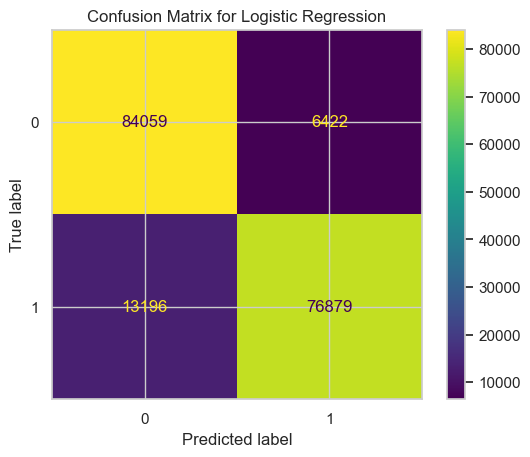

True Positives (TP): 76879
False Positives (FP): 6422
True Negatives (TN): 84059
False Negatives (FN): 13196


In [80]:
# Assuming y_test_resampled contains the resampled test data labels 
# and yhat_lr2 contains the predictions from a logistic regression model
confusion_matrix_lr = confusion_matrix(y_test_resampled, yhat_lr2)

# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Extract True Negatives, False Positives, False Negatives, and True Positives from the matrix
# In binary classification, confusion matrix structure:
# [TN, FP]
# [FN, TP]
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Print these values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


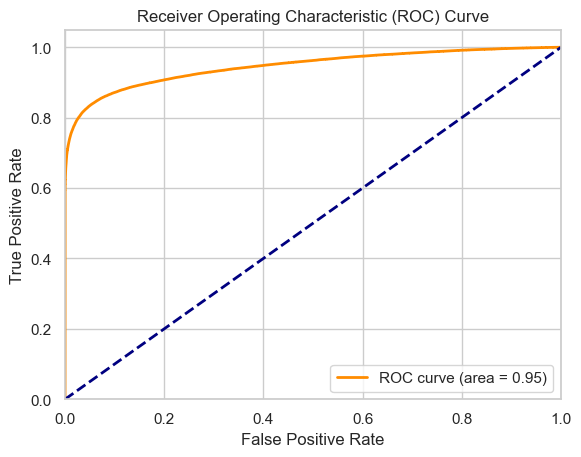

In [81]:
# Predict probabilities on the test set
ylog_probs2 = log_reg2.predict_proba(X_test_resampled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_resampled, ylog_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [82]:
# XG BOOST
xgb2 = XGBClassifier()
# Fitting the model with the training Data
xgb2.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
# Making Predictions
yhat_xgb2 = xgb2.predict(X_test_resampled)

In [84]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train_resampled, xgb2.predict(X_train_resampled)))
print("Test set Accuracy: ", accuracy_score(y_test_resampled, yhat_xgb2))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test_resampled, yhat_xgb2, average='weighted')))

Train set Accuracy:  0.9229190051397176
Test set Accuracy:  0.9181971244378475
F1 Score: 0.9179


In [85]:
# Classification Report
print(classification_report(y_test_resampled, yhat_xgb2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     90481
           1       0.97      0.86      0.91     90075

    accuracy                           0.92    180556
   macro avg       0.92      0.92      0.92    180556
weighted avg       0.92      0.92      0.92    180556



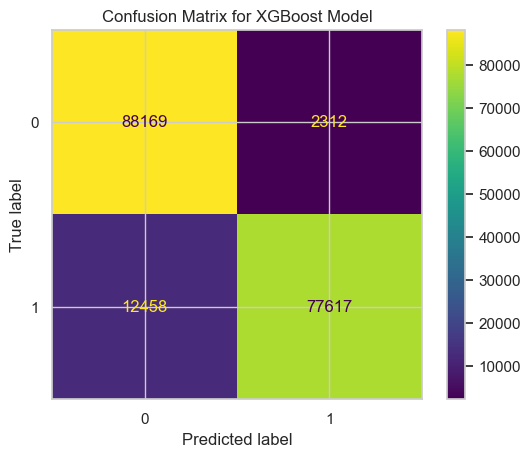

True Positives (TP): 77617
False Positives (FP): 2312
True Negatives (TN): 88169
False Negatives (FN): 12458


In [86]:
# Assuming y_test_resampled contains the resampled test data labels 
# and yhat_xgb2 contains the predictions from an XGBoost model
confusion_matrix_lr = confusion_matrix(y_test_resampled, yhat_xgb2)

# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

# Extract True Negatives, False Positives, False Negatives, and True Positives from the matrix
# In binary classification, confusion matrix structure:
# [TN, FP]
# [FN, TP]
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Print these values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


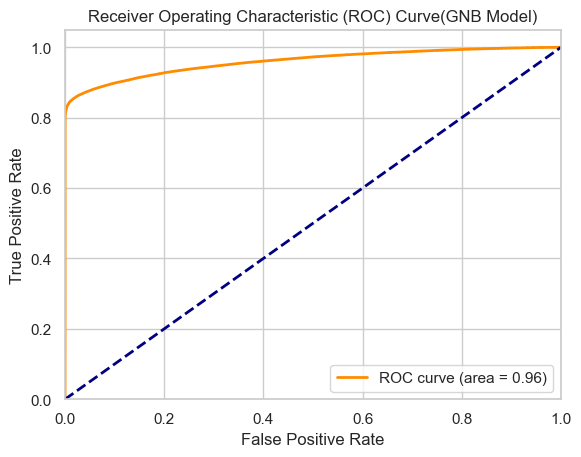

In [87]:
# Predict probabilities on the test set
yxgb_probs2 = xgb2.predict_proba(X_test_resampled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_resampled, yxgb_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve(GNB Model)')
plt.legend(loc="lower right")
plt.show()

In [88]:
# Gaussian Naive Bayes
gnb2 = GaussianNB()
gnb2.fit(X_train_resampled, y_train_resampled)
gnb_yhat2 = gnb2.predict(X_test_resampled)

In [89]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train_resampled, gnb2.predict(X_train_resampled)))
print("Test set Accuracy: ", accuracy_score(y_test_resampled, gnb_yhat2))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test_resampled, gnb_yhat2, average='weighted')))

Train set Accuracy:  0.8729322975128493
Test set Accuracy:  0.8751578457653028
F1 Score: 0.8745


In [90]:
# Classification Report
print(classification_report(y_test_resampled, gnb_yhat2))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     90481
           1       0.94      0.81      0.87     90075

    accuracy                           0.88    180556
   macro avg       0.88      0.88      0.87    180556
weighted avg       0.88      0.88      0.87    180556



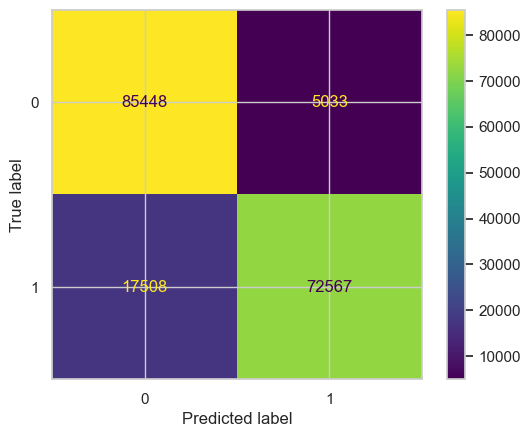

True Positives (TP): 72567
False Positives (FP): 5033
True Negatives (TN): 85448
False Negatives (FN): 17508


In [91]:
# Generate the confusion matrix from the model's predictions
confusion_matrix_lr = confusion_matrix(y_test_resampled, gnb_yhat2)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.show()

# Extracting TP, FP, TN, FN from the confusion matrix
# For a binary classification the matrix shape is 2x2
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Output the results
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


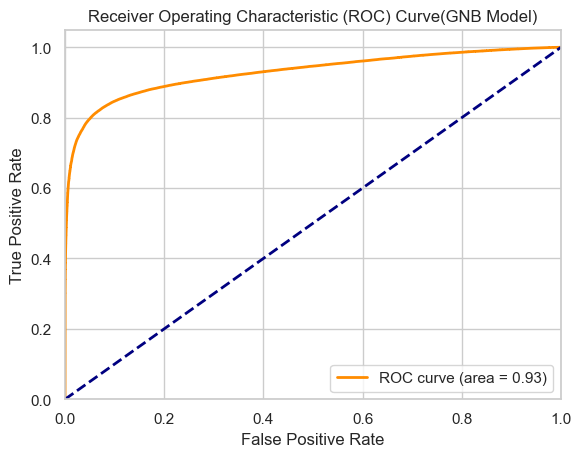

In [92]:
# Predict probabilities on the test set
ygnb_probs2 = gnb2.predict_proba(X_test_resampled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_resampled, ygnb_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve(GNB Model)')
plt.legend(loc="lower right")
plt.show()

In [93]:
#Decision Tree
loanTree2 = DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Training our model
loanTree2.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [94]:
# Prediction
yhat_tree2 = loanTree2.predict(X_test_resampled)

In [95]:
# Checking our Training and Test set accuracy
print("Train set Accuracy: ", accuracy_score(
    y_train_resampled, loanTree2.predict(X_train_resampled)))
print("Test set Accuracy: ", accuracy_score(y_test_resampled, yhat_tree2))
#F1 Score 
print('F1 Score: {:.4f}'.format(
    f1_score(y_test_resampled, yhat_tree2, average='weighted')))

Train set Accuracy:  0.9650521356412831
Test set Accuracy:  0.851912979906511
F1 Score: 0.8519


In [96]:
# Classification Report
print(classification_report(y_test, yhat_tree1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45208
           1       0.00      0.00      0.00      5862

    accuracy                           0.89     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.89      0.83     51070



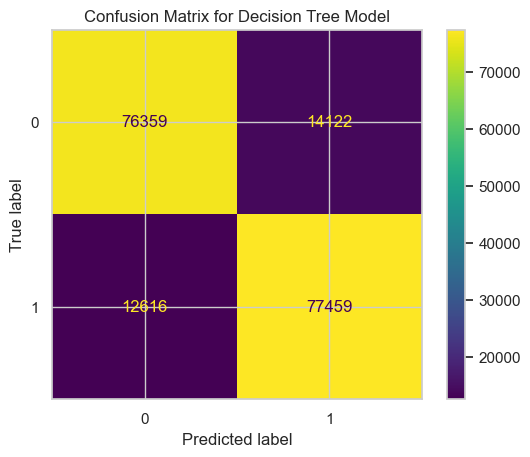

True Positives (TP): 77459
False Positives (FP): 14122
True Negatives (TN): 76359
False Negatives (FN): 12616


In [97]:
# Assuming y_test_resampled contains the resampled test data labels 
# and yhat_tree2 contains the predictions from a decision tree model
confusion_matrix_lr = confusion_matrix(y_test_resampled, yhat_tree2)

# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix_lr).plot()
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

# Extract True Negatives, False Positives, False Negatives, and True Positives from the matrix
# In binary classification, the confusion matrix structure is typically:
# [TN, FP]
# [FN, TP]
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Print these values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


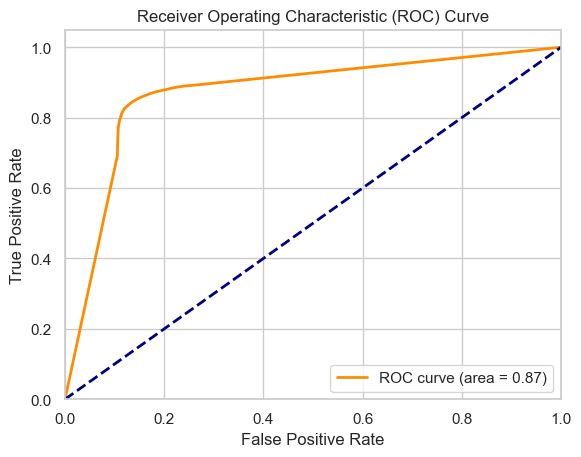

In [98]:
# Predict probabilities on the test set
ytree_probs2 = loanTree2.predict_proba(X_test_resampled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_resampled, ytree_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [99]:
#Comapring all model results
model_names = ['Logistic Regression Model 1', 'Xg Boost Model 1',
               'Gaussian Naive Bayes Model 1', 'Decision Trees Model 1', 'Logistic Regression Model 2', 'Xg Boost Model 2',
               'Gaussian Naive Bayes Model 2', 'Decision Trees Model 2']
test_accuracy = [0.8857, 0.8858, 0.8855,
                 0.8852, 0.8913, 0.9181, 0.8751, 0.8515]
f1_scores = [0.8329, 0.8469, 0.8329, 0.8313, 0.8912, 0.9179, 0.8745, 0.8516]
auc_roc_scores = [0.73, 0.74, 0.74, 0.71, 0.95, 0.96, 0.93, 0.87]
compare_df = pd.DataFrame({
    "Models": model_names,
    "Test Accuracy": test_accuracy,
    "F1-Score": f1_scores,
    "AUC-ROC": auc_roc_scores
})
compare_df

,Models,Test Accuracy,F1-Score,AUC-ROC
0,Logistic Regression Model 1,0.8857,0.8329,0.73
1,Xg Boost Model 1,0.8858,0.8469,0.74
2,Gaussian Naive Bayes Model 1,0.8855,0.8329,0.74
3,Decision Trees Model 1,0.8852,0.8313,0.71
4,Logistic Regression Model 2,0.8913,0.8912,0.95
5,Xg Boost Model 2,0.9181,0.9179,0.96
6,Gaussian Naive Bayes Model 2,0.8751,0.8745,0.93
7,Decision Trees Model 2,0.8515,0.8516,0.87


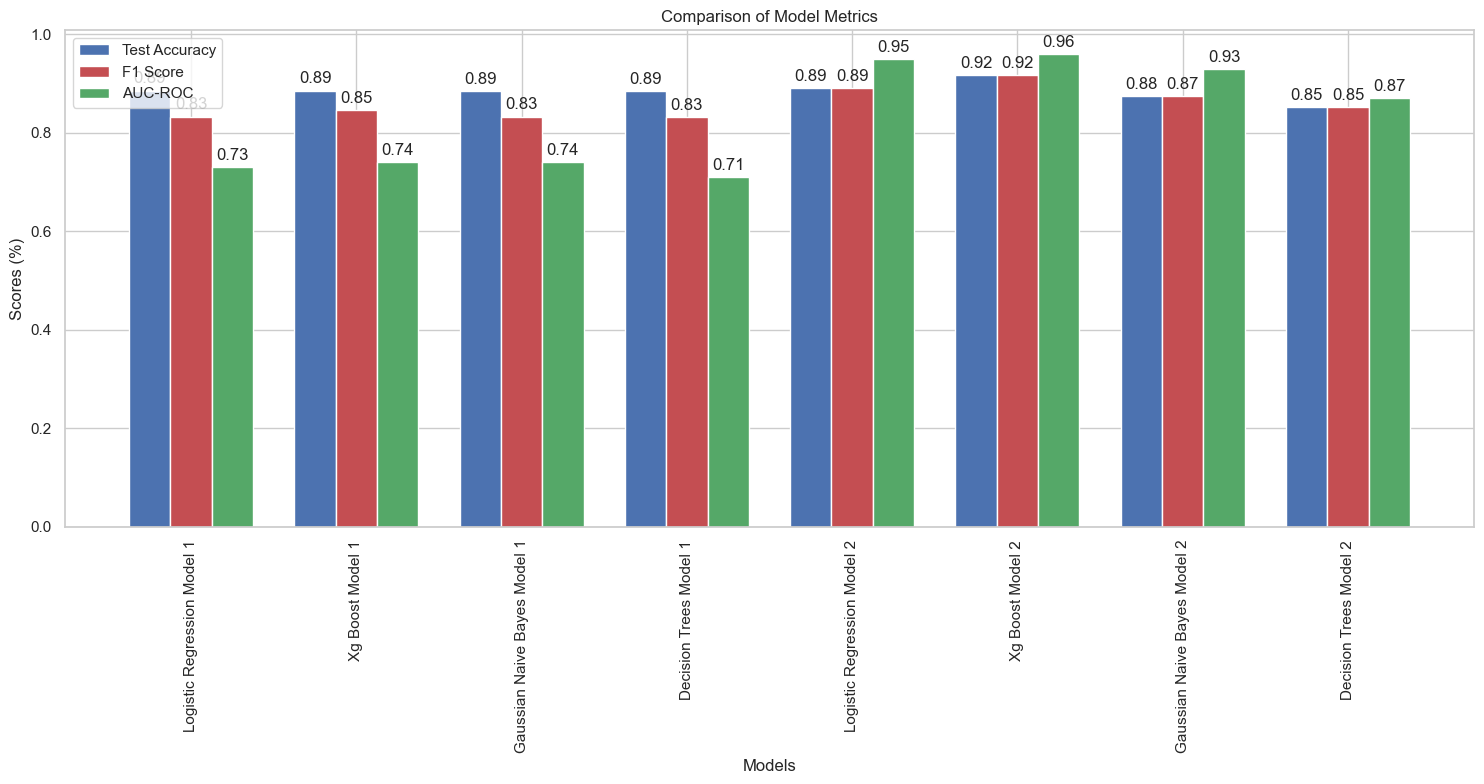

In [100]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(compare_df['Models']))

# Create bars for each metric
bars1 = ax.bar(index, compare_df['Test Accuracy'], bar_width, label='Test Accuracy', color='b')
bars2 = ax.bar(index + bar_width, compare_df['F1-Score'], bar_width, label='F1 Score', color='r')
bars3 = ax.bar(index + 2 * bar_width, compare_df['AUC-ROC'], bar_width, label='AUC-ROC', color='g')

# Add labels, title and axes ticks
ax.set_xlabel('Models')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(compare_df['Models'])
ax.legend()

# Label with the numeric value above each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Improve layout and display the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
